In [ ]:
Task Expectations:

Review the attached data for paid, owned, and earned media channels.
Identify the key metrics that should be measured for each channel, insights that are actionable and client outcomes that are impactful.
Analyze the data to synthesize insights and trends.
Provide recommendations based on the insights derived from the data.
Create a concise visually appealing presentation to showcase your findings and recommendations in a powerpoint presentation OR dashboard in PowerBI / Tableau / Looker Studio – where :-
first tab / slide should be the filled-in playbook.
second tab / slide on correlation between paid data and earned conversations, insights on how all the three channels have impacted each other.
third tab / slide on detailed paid performance
fourth tab / slide on owned social media performance (ER by social content themes; monthly unique visits to website, session duration, referral sources etc. if you could download web domain data from free tools)
fifth on detailed earned conversations/media article thematic segmentation (avoid using bag of words only but try LDA / TF-IDF) and sentiment analysis.
Clearly articulate the outcomes that can be accomplished through effective measurement and analysis of each media channel.
 

Instructions:

Analyze the paid media data and identify the effectiveness of ad campaigns, messaging, and ad spend efficiency. Provide recommendations on how to optimize ad spend and increase conversions.
Evaluate the owned media data to understand owned social content performance. If need be, use free versions of SEMRush/SimilarWeb to gather website traffic data as well, social media engagement rates, and email marketing performance. Suggest strategies to enhance brand visibility, customer relationships, and lead generation.
Assess the earned media data to assess brand awareness using reach/impressions, brand perception using sentiment analysis. Provide insights on how to expand brand reach, improve brand perception.
Summarize your findings, insights, and recommendations in a concise and compelling manner.
Present your analysis and recommendations in a visually appealing slide deck or report format

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy

In [6]:
paid=pd.read_excel(r"C:\Users\pbann\Downloads\Task Data - Paid, Owned & Earned (1).xlsx",sheet_name=1)

In [3]:
owned=pd.read_excel(r"C:\Users\pbann\Downloads\Task Data - Paid, Owned & Earned (1).xlsx",sheet_name=2)

In [5]:
earned=pd.read_excel(r"C:\Users\pbann\Downloads\Task Data - Paid, Owned & Earned (1).xlsx",sheet_name=3)

In [9]:
paid.head(5)

,Campaign Name,Country,Programme,Platform,Assets,Result Type,Results,Engagement,Impressions,Cost Per Result(INR),Total Spend(INR),Cost Per Result(USD),Total Spend(USD),Clicks (All),Video Views,Tweet Engagements
0,FY22 Aruba Japan CPE Cloud Networking Higher...,Japan,Cloud Networking,Twitter-Japan,NaN,Tweet engagements,60,60,6102,34.066667,2044.0,0.466667,28.0,46,0.0,60
1,FY22 Aruba Japan CPC Cloud Networking Higher...,Japan,Cloud Networking,Twitter-Japan,NaN,Link clicks,14,148,25798,146.000000,2044.0,2.000000,28.0,91,0.0,148
2,FY22 Aruba Japan CPE Cloud Networking Retail ...,Japan,Cloud Networking,Twitter-Japan,NaN,Tweet engagements,49,49,5994,37.244898,1825.0,0.510204,25.0,37,0.0,49
3,FY22 Aruba Japan CPC Cloud Networking Retail ...,Japan,Cloud Networking,Twitter-Japan,NaN,Link clicks,14,82,11915,130.357143,1825.0,1.785714,25.0,62,0.0,82
4,FY22 Aruba Australia CPE Cloud Networking Aru...,Australia,Cloud Networking,Twitter-APAC,NaN,Tweet engagements,475,475,5439,4.303158,2044.0,0.058947,28.0,22,0.0,475


In [10]:
df=paid

In [11]:
df.isnull().sum()

Campaign Name            0
Country                  0
Programme                0
Platform                 0
Assets                  39
Result Type              0
Results                  0
Engagement               0
Impressions              0
Cost Per Result(INR)     0
Total Spend(INR)         0
Cost Per Result(USD)     0
Total Spend(USD)         0
Clicks (All)             0
Video Views             17
Tweet Engagements        0
dtype: int64

In [14]:
df['Assets'].unique()

array([nan])

In [15]:
df['Video Views'].unique()

array([   0.,   nan,  788.,  217.,  208., 1759.])

In [22]:
df['Video Views']=df['Video Views'].fillna(0)

In [23]:
df['Video Views'].unique()

array([   0.,  788.,  217.,  208., 1759.])

In [27]:
df.drop('Assets',axis=1,inplace=True)

In [29]:
df.isnull().sum()

Campaign Name           0
Country                 0
Programme               0
Platform                0
Result Type             0
Results                 0
Engagement              0
Impressions             0
Cost Per Result(INR)    0
Total Spend(INR)        0
Cost Per Result(USD)    0
Total Spend(USD)        0
Clicks (All)            0
Video Views             0
Tweet Engagements       0
dtype: int64

In [30]:
df.head(5)

,Campaign Name,Country,Programme,Platform,Result Type,Results,Engagement,Impressions,Cost Per Result(INR),Total Spend(INR),Cost Per Result(USD),Total Spend(USD),Clicks (All),Video Views,Tweet Engagements
0,FY22 Aruba Japan CPE Cloud Networking Higher...,Japan,Cloud Networking,Twitter-Japan,Tweet engagements,60,60,6102,34.066667,2044.0,0.466667,28.0,46,0.0,60
1,FY22 Aruba Japan CPC Cloud Networking Higher...,Japan,Cloud Networking,Twitter-Japan,Link clicks,14,148,25798,146.000000,2044.0,2.000000,28.0,91,0.0,148
2,FY22 Aruba Japan CPE Cloud Networking Retail ...,Japan,Cloud Networking,Twitter-Japan,Tweet engagements,49,49,5994,37.244898,1825.0,0.510204,25.0,37,0.0,49
3,FY22 Aruba Japan CPC Cloud Networking Retail ...,Japan,Cloud Networking,Twitter-Japan,Link clicks,14,82,11915,130.357143,1825.0,1.785714,25.0,62,0.0,82
4,FY22 Aruba Australia CPE Cloud Networking Aru...,Australia,Cloud Networking,Twitter-APAC,Tweet engagements,475,475,5439,4.303158,2044.0,0.058947,28.0,22,0.0,475


In [31]:
df['Country'].unique()

array(['Japan', 'Australia', 'New Zealand', 'India', 'Singapore',
       'Indonesia', 'Malaysia', 'Hong Kong', 'Thailand', 'Taiwan'],
      dtype=object)

In [32]:
df['Programme'].unique()

array(['Cloud Networking'], dtype=object)

In [33]:
df['Platform'].unique()

array(['Twitter-Japan', 'Twitter-APAC', 'Facebook'], dtype=object)

<AxesSubplot:ylabel='Frequency'>

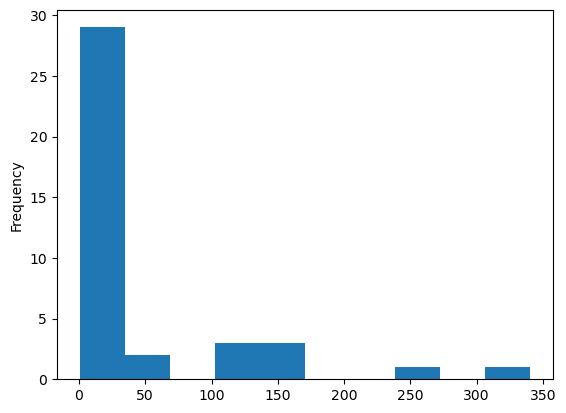

In [34]:
df['Cost Per Result(INR)'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

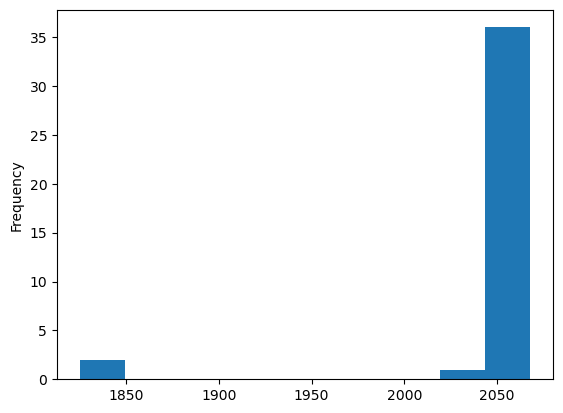

In [36]:
df['Total Spend(INR)'].plot(kind='hist')

<AxesSubplot:ylabel='Country'>

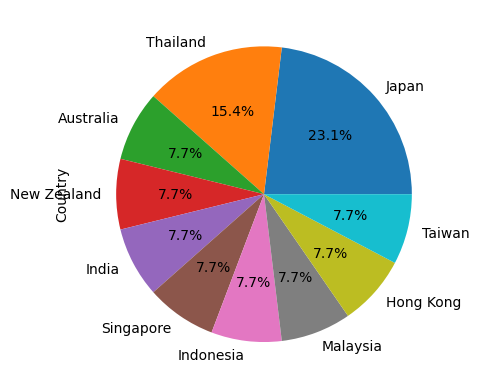

In [37]:
df['Country'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='Platform'>

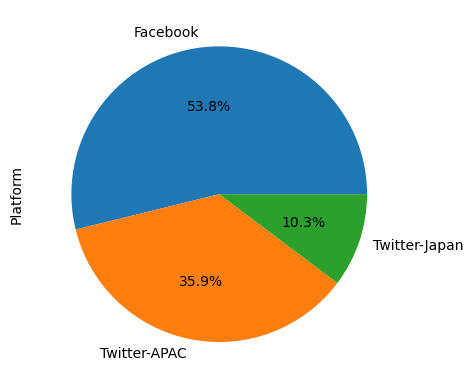

In [38]:
df['Platform'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='Result Type'>

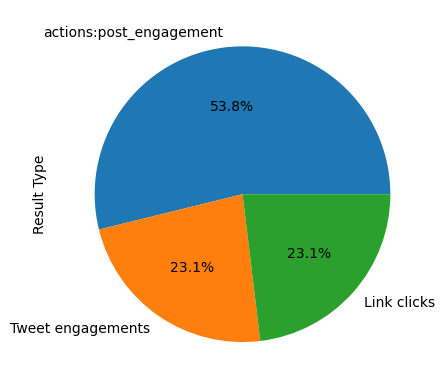

In [39]:
df['Result Type'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [41]:
df.head()

,Campaign Name,Country,Programme,Platform,Result Type,Results,Engagement,Impressions,Cost Per Result(INR),Total Spend(INR),Cost Per Result(USD),Total Spend(USD),Clicks (All),Video Views,Tweet Engagements
0,FY22 Aruba Japan CPE Cloud Networking Higher...,Japan,Cloud Networking,Twitter-Japan,Tweet engagements,60,60,6102,34.066667,2044.0,0.466667,28.0,46,0.0,60
1,FY22 Aruba Japan CPC Cloud Networking Higher...,Japan,Cloud Networking,Twitter-Japan,Link clicks,14,148,25798,146.000000,2044.0,2.000000,28.0,91,0.0,148
2,FY22 Aruba Japan CPE Cloud Networking Retail ...,Japan,Cloud Networking,Twitter-Japan,Tweet engagements,49,49,5994,37.244898,1825.0,0.510204,25.0,37,0.0,49
3,FY22 Aruba Japan CPC Cloud Networking Retail ...,Japan,Cloud Networking,Twitter-Japan,Link clicks,14,82,11915,130.357143,1825.0,1.785714,25.0,62,0.0,82
4,FY22 Aruba Australia CPE Cloud Networking Aru...,Australia,Cloud Networking,Twitter-APAC,Tweet engagements,475,475,5439,4.303158,2044.0,0.058947,28.0,22,0.0,475


In [9]:
owned.head(2)

,Platform,Post Message,Permalink,Countries,Program,Campaign,Asset,Date,Impressions,Impressions 2,Engagement,Engagements 2,clicks,Clicks 2,ER,CTR,Paid/Organic,Type
0,Facebook,#Hybridwork is the future. And to thrive in th...,https://www.facebook.com/ArubaApac/posts/23616...,Thailand,Event,NaN,‘Connected Smart Workplace from Anywhere’ webinar,2022-04-27 12:46:13,189,189.0,0,0.0,0,0.0,0.0,0.0,Organic,Photo
1,Facebook,【https://hpe.to/6181z6nrBに掲載されました】ArubaがNaaSの新...,https://www.facebook.com/ArubaApac/posts/23616...,Japan,PR Coverage,NaN,Aruba automates NaaS's new strategy,2022-04-27 13:37:06,13,13.0,0,0.0,0,0.0,0.0,0.0,Organic,Link


In [16]:
df=owned.copy()

In [17]:
df.drop(columns=['Impressions 2','Engagements 2','Clicks 2','Permalink'],inplace=True)

In [18]:
df.head(2)

,Platform,Post Message,Countries,Program,Campaign,Asset,Date,Impressions,Engagement,clicks,ER,CTR,Paid/Organic,Type
0,Facebook,#Hybridwork is the future. And to thrive in th...,Thailand,Event,NaN,‘Connected Smart Workplace from Anywhere’ webinar,2022-04-27 12:46:13,189,0,0,0.0,0.0,Organic,Photo
1,Facebook,【https://hpe.to/6181z6nrBに掲載されました】ArubaがNaaSの新...,Japan,PR Coverage,NaN,Aruba automates NaaS's new strategy,2022-04-27 13:37:06,13,0,0,0.0,0.0,Organic,Link


In [2]:
df=pd.read_csv(r"C:\Users\pbann\Downloads\TG1101 UNIT-2 MOT LEVEL.csv")

C:\Users\pbann\AppData\Local\Temp\ipykernel_18160\4060660888.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\pbann\Downloads\TG1101 UNIT-2 MOT LEVEL.csv")


In [3]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,BRG L.O.P OUT PRESS,DC EMR L.O.P OUT PRESS,LUBE OIL PRESS.,ZERO SPEED 1,LUBE OIL TANK LEVEL,EMG L.O.P MTR CURRT,EMG HP SEAL P MTR CURRT,BRG L.O.P MTR CURRT,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,D,161,30-04-2023,00:00:00,India Standard Time,-0.009,-0.002,0.181,2995.7,-6.039,0.1,0,0.98,NaN,NaN,NaN,NaN,NaN,NaN,B
1,D,161,30-04-2023,00:00:01,India Standard Time,-0.009,-0.002,0.181,2995.7,-6.041,0.1,0,0.98,NaN,NaN,NaN,NaN,NaN,NaN,B
2,D,161,30-04-2023,00:00:02,India Standard Time,-0.009,-0.002,0.181,2995.9,-6.045,0.1,0,0.98,NaN,NaN,NaN,NaN,NaN,NaN,B
3,D,161,30-04-2023,00:00:03,India Standard Time,-0.009,-0.002,0.181,2996.0,-6.044,0.1,0,0.97,NaN,NaN,NaN,NaN,NaN,NaN,B
4,D,161,30-04-2023,00:00:04,India Standard Time,-0.009,-0.002,0.181,2995.9,-6.039,0.1,0,0.98,NaN,NaN,NaN,NaN,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048557,D,161,12-05-2023,03:15:57,India Standard Time,-0.010,-0.003,0.181,3001.1,-5.967,0.1,0,0.98,NaN,NaN,NaN,NaN,NaN,NaN,B
1048558,D,161,12-05-2023,03:15:58,India Standard Time,-0.010,-0.003,0.181,3000.8,-5.968,0.1,0,0.98,NaN,NaN,NaN,NaN,NaN,NaN,B
1048559,D,161,12-05-2023,03:15:59,India Standard Time,-0.010,-0.003,0.181,3001.0,-5.969,0.1,0,0.97,NaN,NaN,NaN,NaN,NaN,NaN,B
1048560,D,161,12-05-2023,03:16:00,India Standard Time,-0.010,-0.003,0.181,3001.6,-5.969,0.1,0,0.97,NaN,NaN,NaN,NaN,NaN,NaN,B


In [4]:
df=df[['Unnamed: 2','Unnamed: 3','LUBE OIL TANK LEVEL']]

In [5]:
df

,Unnamed: 2,Unnamed: 3,LUBE OIL TANK LEVEL
0,30-04-2023,00:00:00,-6.039
1,30-04-2023,00:00:01,-6.041
2,30-04-2023,00:00:02,-6.045
3,30-04-2023,00:00:03,-6.044
4,30-04-2023,00:00:04,-6.039
...,...,...,...
1048557,12-05-2023,03:15:57,-5.967
1048558,12-05-2023,03:15:58,-5.968
1048559,12-05-2023,03:15:59,-5.969
1048560,12-05-2023,03:16:00,-5.969


In [6]:
df.rename(columns={'Unnamed: 2':'DATE','Unnamed: 3':'TIME'},inplace=True)

C:\Users\pbann\AppData\Local\Temp\ipykernel_18160\4023694618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Unnamed: 2':'DATE','Unnamed: 3':'TIME'},inplace=True)


In [7]:
df

,DATE,TIME,LUBE OIL TANK LEVEL
0,30-04-2023,00:00:00,-6.039
1,30-04-2023,00:00:01,-6.041
2,30-04-2023,00:00:02,-6.045
3,30-04-2023,00:00:03,-6.044
4,30-04-2023,00:00:04,-6.039
...,...,...,...
1048557,12-05-2023,03:15:57,-5.967
1048558,12-05-2023,03:15:58,-5.968
1048559,12-05-2023,03:15:59,-5.969
1048560,12-05-2023,03:16:00,-5.969


In [18]:
df=df.iloc[1::100]

In [19]:
df

,DATE,TIME,LUBE OIL TANK LEVEL
101,30-04-2023,00:01:41,-6.041
10101,30-04-2023,02:48:21,-6.045
20101,30-04-2023,05:35:01,-6.055
30101,30-04-2023,08:21:41,-6.053
40101,30-04-2023,11:08:21,-6.061
...,...,...,...
1000101,11-05-2023,13:48:21,-5.922
1010101,11-05-2023,16:35:01,-5.919
1020101,11-05-2023,19:21:41,-5.930
1030101,11-05-2023,22:08:21,-5.945


In [41]:
df.to_excel('2_min.xlsx')

In [20]:
df=df.iloc[1::3]

In [45]:
df.to_excel('5_min.xlsx')

In [21]:
df

,DATE,TIME,LUBE OIL TANK LEVEL
10101,30-04-2023,02:48:21,-6.045
40101,30-04-2023,11:08:21,-6.061
70101,30-04-2023,19:28:21,-6.052
100101,01-05-2023,03:48:21,-6.059
130101,01-05-2023,12:08:21,-6.035
160101,01-05-2023,20:28:21,-6.038
190101,02-05-2023,04:48:21,-6.043
220101,02-05-2023,13:08:21,-6.020
250101,02-05-2023,21:28:21,-6.010
280101,03-05-2023,05:48:21,-6.028


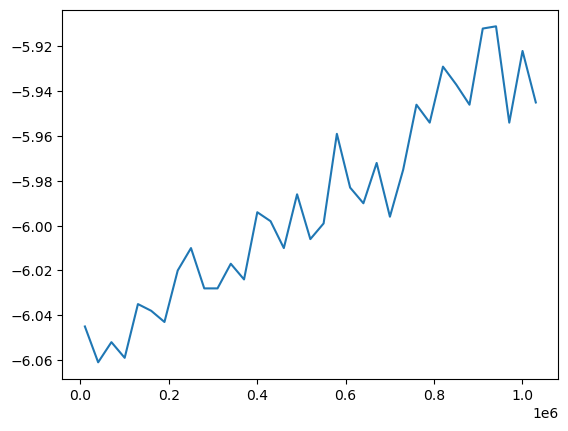

In [22]:
plt.plot(df['LUBE OIL TANK LEVEL'])

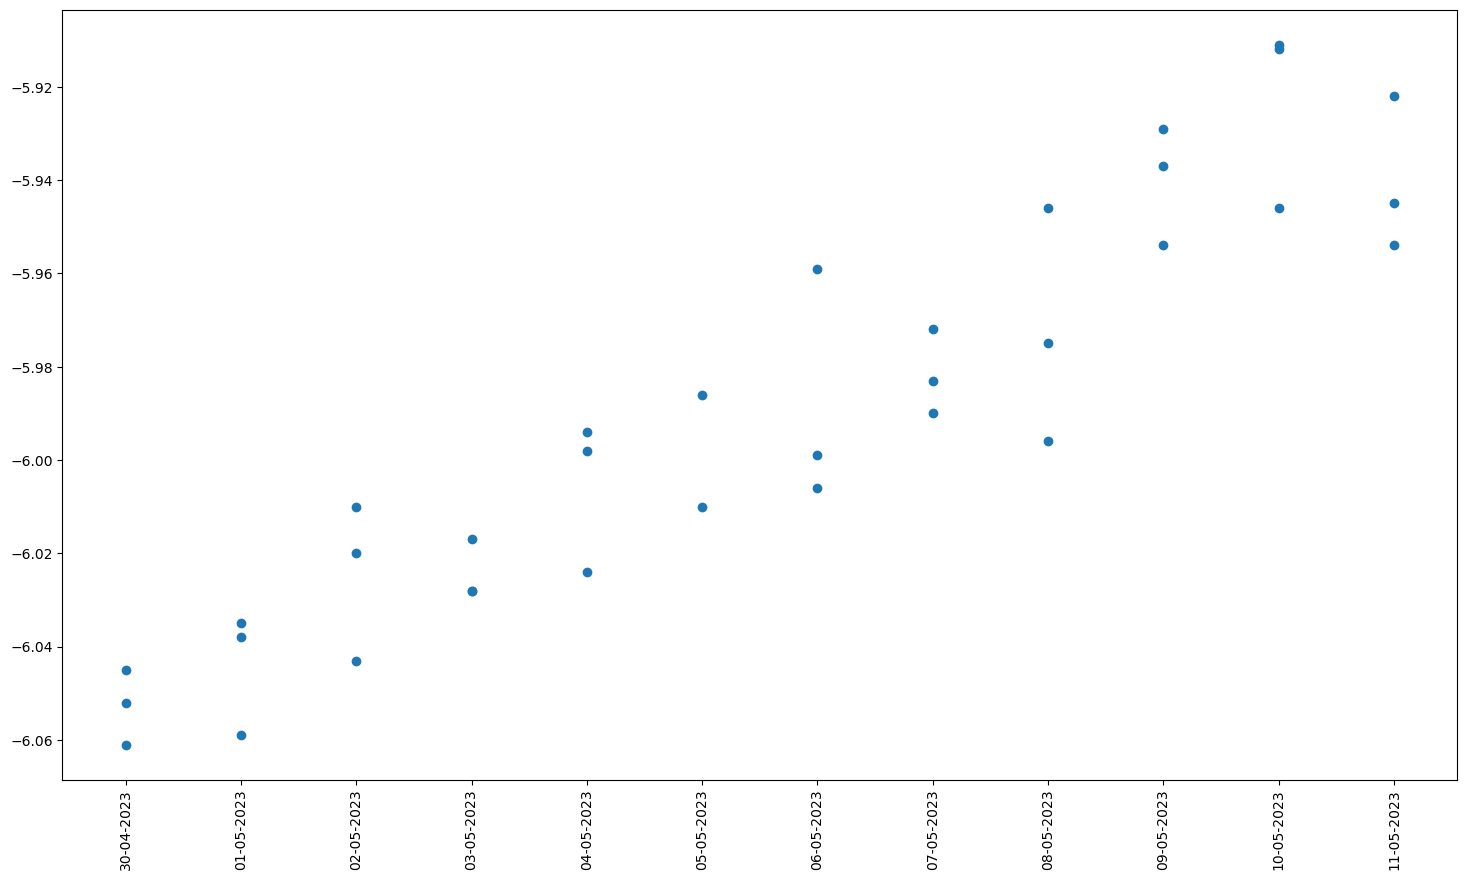

In [30]:
plt.figure(figsize=(18,10))
plt.scatter(df['DATE'],df['LUBE OIL TANK LEVEL'])

plt.xticks(rotation='vertical')
plt.show()

In [34]:
df['LUBE OIL TANK LEVEL'].min()

-6.061